<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/5_%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8A%B9%ED%95%98%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 로드

In [ ]:
# thousands = "제거할값"
df_subway = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/2024년 05월  교통카드 통계자료.xls",
                          sheet_name=2, usecols="B, D:H", thousands="," )
df_subway.head(3)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1479117,1428188,236809,228836
1,1호선,시청,691098,693899,107105,103074
2,1호선,종각,989168,970072,162080,151268


### 데이터 탐색

In [ ]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     620 non-null    object
 1   지하철역    620 non-null    object
 2   유임승차    620 non-null    int64 
 3   유임하차    620 non-null    int64 
 4   무임승차    620 non-null    int64 
 5   무임하차    620 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 29.2+ KB


In [ ]:
# 행, 열
df_subway.shape

(620, 6)

In [ ]:
# 지하철역 기준 개수 세기
df_subway["지하철역"].value_counts()

지하철역
서울역         5
김포공항        4
공덕          4
고속터미널       3
디지털미디어시티    3
           ..
초지          1
고잔          1
중앙          1
한대앞         1
관악산(서울대)    1
Name: count, Length: 528, dtype: int64

## 데이터 분석
- 유임승차비율이 가장 높은 역은?
  - 유임승차비율 = 유임승차 / 무임승차
  - 유임승차비율2 = 유임승차 / (무임승차 + 유임승차)
- 무임승차비율이 가장 높은 역은?

In [ ]:
df_subway["유임승차비율"] = round(df_subway["유임승차"] / df_subway["무임승차"],1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,1호선,서울역,1479117,1428188,236809,228836,6.2
1,1호선,시청,691098,693899,107105,103074,6.5
2,1호선,종각,989168,970072,162080,151268,6.1
3,1호선,종로3가,519210,467584,306638,280264,1.7
4,1호선,종로5가,490609,478781,268475,260570,1.8


In [ ]:
# 유임승차비율로 정렬
df_subway.sort_values("유임승차비율", ascending=False, ignore_index=True)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,경원선,창동,90,0,0,0,inf
1,경의선,검암,1,0,0,0,inf
2,경의선,계양,6,0,0,0,inf
3,7호선,부평구청,1,0,0,0,inf
4,일산선,지축,67,0,1,0,67.0
...,...,...,...,...,...,...,...
615,중앙선,지평,885,1177,1239,1289,0.7
616,중앙선,원덕,5317,5167,7501,7241,0.7
617,경의선,운천,83,28,148,117,0.6
618,경원선,연천,15139,14641,30962,32183,0.5


In [ ]:
# 유임승차비율 != inf & 유임승차비율 > 0
condition = (df_subway["유임승차비율"] != np.inf) & (df_subway["유임승차비율"] > 0) & (df_subway["유임승차"] > 10000)

In [ ]:
# 호선명, 지하철역, 유임승차비율, 내림차순 정렬
df_subway_rank = df_subway.loc[condition][["호선명", "지하철역", "유임승차비율"]].sort_values("유임승차비율", ascending=False, ignore_index=True)
df_subway_rank

,호선명,지하철역,유임승차비율
0,2호선,한양대,26.3
1,공항철도 1호선,홍대입구,20.6
2,2호선,홍대입구,20.5
3,6호선,한강진,15.7
4,경부선,서울역,15.3
...,...,...,...
592,1호선,제기동,0.9
593,우이신설선,삼양사거리,0.9
594,중앙선,용문,0.8
595,경원선,연천,0.5


In [ ]:
df_subway["유임승차비율2"] = round(df_subway["유임승차"] / (df_subway["무임승차"] + df_subway["유임승차"]) * 100,1)
df_subway

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
0,1호선,서울역,1479117,1428188,236809,228836,6.2,86.2
1,1호선,시청,691098,693899,107105,103074,6.5,86.6
2,1호선,종각,989168,970072,162080,151268,6.1,85.9
3,1호선,종로3가,519210,467584,306638,280264,1.7,62.9
4,1호선,종로5가,490609,478781,268475,260570,1.8,64.6
...,...,...,...,...,...,...,...,...
615,신림선,당곡,101289,96445,41856,40832,2.4,70.8
616,신림선,신림,39938,54617,19110,22806,2.1,67.6
617,신림선,서원,79983,66593,27465,27170,2.9,74.4
618,신림선,서울대벤처타운,228198,201491,73218,72303,3.1,75.7


In [ ]:
# 유임승차인원 > 10000 / 내림차순
condition = df_subway["유임승차"] > 10000
df_subway.loc[condition][["호선명", "지하철역", "유임승차비율2"]].sort_values("유임승차비율2", ascending=False, ignore_index=True)

,호선명,지하철역,유임승차비율2
0,2호선,한양대,96.3
1,2호선,홍대입구,95.4
2,공항철도 1호선,홍대입구,95.4
3,6호선,한강진,94.0
4,경부선,서울역,93.9
...,...,...,...
592,우이신설선,삼양사거리,48.7
593,1호선,제기동,46.8
594,중앙선,용문,45.2
595,경원선,연천,32.8


In [ ]:
df_subway.loc[condition].sort_values("유임승차비율2", ignore_index=True).head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
0,경원선,소요산,16264,16382,50893,49270,0.3,24.2
1,경원선,연천,15139,14641,30962,32183,0.5,32.8
2,중앙선,용문,36954,36874,44852,44476,0.8,45.2
3,1호선,제기동,249016,238896,283615,303596,0.9,46.8
4,우이신설선,삼양사거리,40067,39989,42209,41806,0.9,48.7
5,1호선,동묘앞,176547,186029,175272,177168,1.0,50.2
6,중앙선,운길산,15519,14787,15215,15463,1.0,50.5
7,우이신설선,삼양,33523,33645,31311,34004,1.1,51.7
8,경원선,도봉산,144216,83656,133905,105998,1.1,51.9
9,우이신설선,신설동,38250,38189,35088,30923,1.1,52.2


- 유무임 승하차 인원이 가장 많은 역

In [ ]:
# 유임승차 인원이 가장 많은 역

# df_subway.sort_values("유임승차", ascending=False, ignore_index=True).head(1)
# df_subway[df_subway["유임승차"].max() == df_subway["유임승차"]]

# 유임승차 인원이 가장 적은 역
df_subway[df_subway["유임승차"].min() == df_subway["유임승차"]]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2,무임승하차
335,경의선,검암,1,0,0,0,inf,100.0,0
525,7호선,부평구청,1,0,0,0,inf,100.0,0


In [ ]:
# 유임하차 인원이 가장 많은 역
# df_subway.sort_values("유임하차", ascending=False, ignore_index=True).head(1)
df_subway[df_subway["유임하차"].max() == df_subway["유임하차"]]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2,무임승하차
48,2호선,홍대입구,2181301,2370397,106253,103537,20.5,95.4,209790


In [ ]:
# 무임승하차 인원이 가장 많은 역
df_subway["무임승하차"] = df_subway["무임승차"] + df_subway["무임하차"]
df_subway.sort_values(["무임승하차"], ascending=False, ignore_index=True).head(1)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2,무임승하차
0,경부선,영등포,1008266,1032273,317526,317116,3.2,76.1,634642


## 시각화

In [ ]:
# 유임승차 >= 100만
condition = df_subway["유임승차"] >= 1000000
df_chart = df_subway.loc[condition, ["지하철역", "유임승차", "유임하차", "무임승차", "무임하차"]].copy()

In [ ]:
df_chart.head()

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1479117,1428188,236809,228836
11,을지로입구,1319969,1355563,107082,99955
20,성수,1185919,1320446,106377,106981
21,건대입구,1088906,1138735,102314,105211
25,잠실(송파구청),2255264,2218730,236852,224844


In [ ]:
# 인덱스 설정

df_chart.set_index("지하철역", inplace=True)

In [ ]:
df_chart = df_chart.T
df_chart

지하철역,서울역,을지로입구,성수,건대입구,잠실(송파구청),삼성(무역센터),선릉,역삼,강남,사당,...,구로디지털단지,신도림,홍대입구,신촌,고속터미널,혜화,용산,영등포,수원,가산디지털단지
유임승차,1479117,1319969,1185919,1088906,2255264,1459592,1332850,1204540,2170143,1022169,...,1453390,1300773,2181301,1111202,1403525,1018528,1215040,1008266,1152444,1070189
유임하차,1428188,1355563,1320446,1138735,2218730,1479135,1177675,1390728,2132649,1138461,...,1430847,1288214,2370397,1149712,1312101,1033236,1228962,1032273,1215503,1077544
무임승차,236809,107082,106377,102314,236852,130918,243916,146474,168661,227346,...,212388,245096,106253,129319,238488,134994,155789,317526,180778,103569
무임하차,228836,99955,106981,105211,224844,120896,214345,150501,147481,219041,...,212157,231035,103537,126926,223509,132754,154078,317116,182999,98730


In [ ]:
len(df_chart)
len(df_chart.columns)

22

In [ ]:
# pandas 라이브러리로 차트 작성

df_chart.plot.pie(subplots=True, layout=(11,2), autopct="%.1f%%", legend=False, figsize=(10,50));


## 시간대별

In [ ]:
# 호선명, 지하철역, 4:00 ~ 24:00
df_subway = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/2024년 05월  교통카드 통계자료.xls",
                          sheet_name=3, usecols="B, D:AR", skiprows=1, thousands=",")
df_subway

,Unnamed: 1,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,...,승차.15,하차.15,승차.16,하차.16,승차.17,하차.17,승차.18,하차.18,승차.19,하차.19
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,127756,72734,91062,53023,94433,49173,62106,33456,30783,16695
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,65001,15501,60184,11419,56661,9962,34372,7292,11310,4696
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,97830,26910,88518,14902,94549,11103,66342,7991,29575,5499
3,1호선,종로3가,194,7,4294,2708,4106,14292,6284,29101,...,60263,24477,54181,14575,57716,11432,44832,8986,21757,5957
4,1호선,종로5가,53,1,2233,3786,3435,18472,6016,44110,...,50922,20595,38774,11940,34722,8514,22492,6320,6968,4295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,신림선,당곡,0,0,2136,209,4543,1179,13836,3883,...,5499,12838,4578,8241,3129,7401,2177,7082,1085,4404
616,신림선,신림,1,0,1182,314,1609,827,4622,1598,...,2913,6977,2157,4299,1841,3746,1674,3235,899,2215
617,신림선,서원,2,0,2355,336,4543,863,14111,1442,...,2674,10967,1886,7007,1401,7197,1232,7027,494,4474
618,신림선,서울대벤처타운,13,1,7001,531,11241,4171,32600,6848,...,8960,28670,7058,18068,5540,18153,5774,17571,2264,12976


### 데이터 전처리
- 컬럼명 변경 : 호선명, 지하철역, 승차_4, 하차_4 ...

In [ ]:
list1 = ["호선명", "지하철역"]

for i in range(4, 24):
  list1.append("승차_"+str(i))
  list1.append("하차_"+str(i))
len(list1)

42

In [ ]:
df_subway.columns = list1
df_subway.head(2)

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_19,하차_19,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,127756,72734,91062,53023,94433,49173,62106,33456,30783,16695
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,65001,15501,60184,11419,56661,9962,34372,7292,11310,4696


### 분석
- 출근 시간대(7~9) 사람들이 가장 많이 타는 역 찾기

In [ ]:
df_subway["출근 계"] = df_subway["승차_7"]+df_subway["승차_8"]+df_subway["승차_9"]
df_subway["하차 계"] = df_subway["하차_7"]+df_subway["하차_8"]+df_subway["하차_9"]

In [ ]:
df_subway[df_subway["출근 계"].max() == df_subway["출근 계"]]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,출근 계,하차 계
39,2호선,신림,217,5,39624,4285,72112,18451,184578,29861,...,47809,123872,44869,123630,37752,115187,22235,74882,617864,120512


In [ ]:
df_subway[df_subway["하차 계"].max() == df_subway["하차 계"]]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,출근 계,하차 계
30,2호선,역삼,55,1,3902,7881,9260,41795,16692,157268,...,85438,24295,77816,20958,53189,17724,21018,11143,68880,816320


- 특정 시간대 사람들이 가장 많이 타는 역 알아보기

In [ ]:
# 밤 11 시에 가장 혼잡한 역은?

len(df_subway.columns)

44

In [ ]:
df_subway[df_subway["승차_4"].max() == df_subway["승차_4"]]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,출근 계,하차 계
128,경부선,구로,12967,65,22999,4704,19789,13663,39484,31757,...,21121,21813,17856,21484,12766,18755,4877,13972,107386,140240


In [ ]:
idx = 2 + (23 - 4) *2

df_subway.iloc[:, idx]

0      30783
1      11310
2      29575
3      21757
4       6968
       ...  
615     1085
616      899
617      494
618     2264
619      830
Name: 승차_23, Length: 620, dtype: int64

In [ ]:
answer = int(input("승차 인원이 궁금한 시간을 입력해 주세요(24시간 형태로 숫자만) "))

idx = 2 + (answer - 4) *2
df_subway[df_subway.iloc[:, idx].max() == df_subway.iloc[:, idx]]

승차 인원이 궁금한 시간을 입력해 주세요(24시간 형태로 숫자만) 18


,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,출근 계,하차 계
31,2호선,강남,202,7,8610,12221,18832,57752,41262,161939,...,165847,61527,188088,52670,163006,44364,75548,26529,161461,791010


- 시간대별로 사람들이 가장 많이 타고 내리는 역은?

In [ ]:
# 5시 최대 승차인원의 인덱스?

# df_subway["승차_5"].max()
# max(df_subway["승차_5"])

# idxmax() : 컬럼에서 가장 높은 행의 인덱스를 돌려줌
max_idx = df_subway["승차_5"].idxmax()
max_idx


162

In [ ]:
# df_subway.iloc[max_idx,1]
df_subway.iloc[max_idx]["지하철역"]

'부천'

In [ ]:
max_idx_list = list(range(2,42))
for i in max_idx_list:
  max_idx = max_idx = df_subway.iloc[:,i].idxmax()
  print(df_subway.iloc[max_idx,1])

구로
영등포
부천
강남
신림
서울역
신림
강남
신림
가산디지털단지
신림
강남
신림
강남
잠실(송파구청)
홍대입구
잠실(송파구청)
홍대입구
잠실(송파구청)
홍대입구
잠실(송파구청)
홍대입구
잠실(송파구청)
홍대입구
잠실(송파구청)
홍대입구
강남
홍대입구
강남
잠실(송파구청)
강남
신림
홍대입구
신림
홍대입구
신림
홍대입구
신림
홍대입구
신림


In [ ]:
#
groups_col = df_subway.columns.difference(['호선명', '지하철역', '출근 계', '하차 계'], sort=False)
groups_col

Index(['승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7', '하차_7', '승차_8',
       '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11', '하차_11', '승차_12',
       '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15', '하차_15', '승차_16',
       '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19', '하차_19', '승차_20',
       '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23', '하차_23'],
      dtype='object')

In [ ]:
# 각 시간대 최대 승하차 인원의 인덱스 추출

idx_max = df_subway[groups_col].idxmax().to_list()

In [ ]:
# 각 시간대 최대 승하차 인원

passenger_max = df_subway[groups_col].max().to_list()

In [ ]:
data = {
    "승하차" : groups_col,
    "idx_max" : idx_max,
    "승객수" : passenger_max
}

df_passenger_max_time = pd.DataFrame(data)
df_passenger_max_time.head()

,승하차,idx_max,승객수
0,승차_4,128,12967
1,하차_4,125,131
2,승차_5,162,42292
3,하차_5,31,12221
4,승차_6,39,72112


In [ ]:
# 지하철역 추가
# df_subway.iloc[idx_max, "지하철역"]
df_passenger_max_time["지하철역"]=df_subway.loc[idx_max]["지하철역"].to_list()
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역
0,승차_4,128,12967,구로
1,하차_4,125,131,영등포
2,승차_5,162,42292,부천
3,하차_5,31,12221,강남
4,승차_6,39,72112,신림


### 시각화

In [ ]:
# 승하차 컬럼에서 숫자만 잘라내기

df_passenger_max_time["승하차"].str.split("_", expand=True)[1]

0      4
1      4
2      5
3      5
4      6
5      6
6      7
7      7
8      8
9      8
10     9
11     9
12    10
13    10
14    11
15    11
16    12
17    12
18    13
19    13
20    14
21    14
22    15
23    15
24    16
25    16
26    17
27    17
28    18
29    18
30    19
31    19
32    20
33    20
34    21
35    21
36    22
37    22
38    23
39    23
Name: 1, dtype: object

In [ ]:
df_passenger_max_time["hour"] = df_passenger_max_time["승하차"].str.split("_", expand=True)[1]
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역,hour
0,승차_4,128,12967,구로,4
1,하차_4,125,131,영등포,4
2,승차_5,162,42292,부천,5
3,하차_5,31,12221,강남,5
4,승차_6,39,72112,신림,6


In [ ]:
# 혼잡역 = 지하철역_hour
# 구로_4
df_passenger_max_time["혼잡역"] = df_passenger_max_time["지하철역"]+"_"+df_passenger_max_time["hour"]
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역,hour,혼잡역
0,승차_4,128,12967,구로,4,구로_4
1,하차_4,125,131,영등포,4,영등포_4
2,승차_5,162,42292,부천,5,부천_5
3,하차_5,31,12221,강남,5,강남_5
4,승차_6,39,72112,신림,6,신림_6


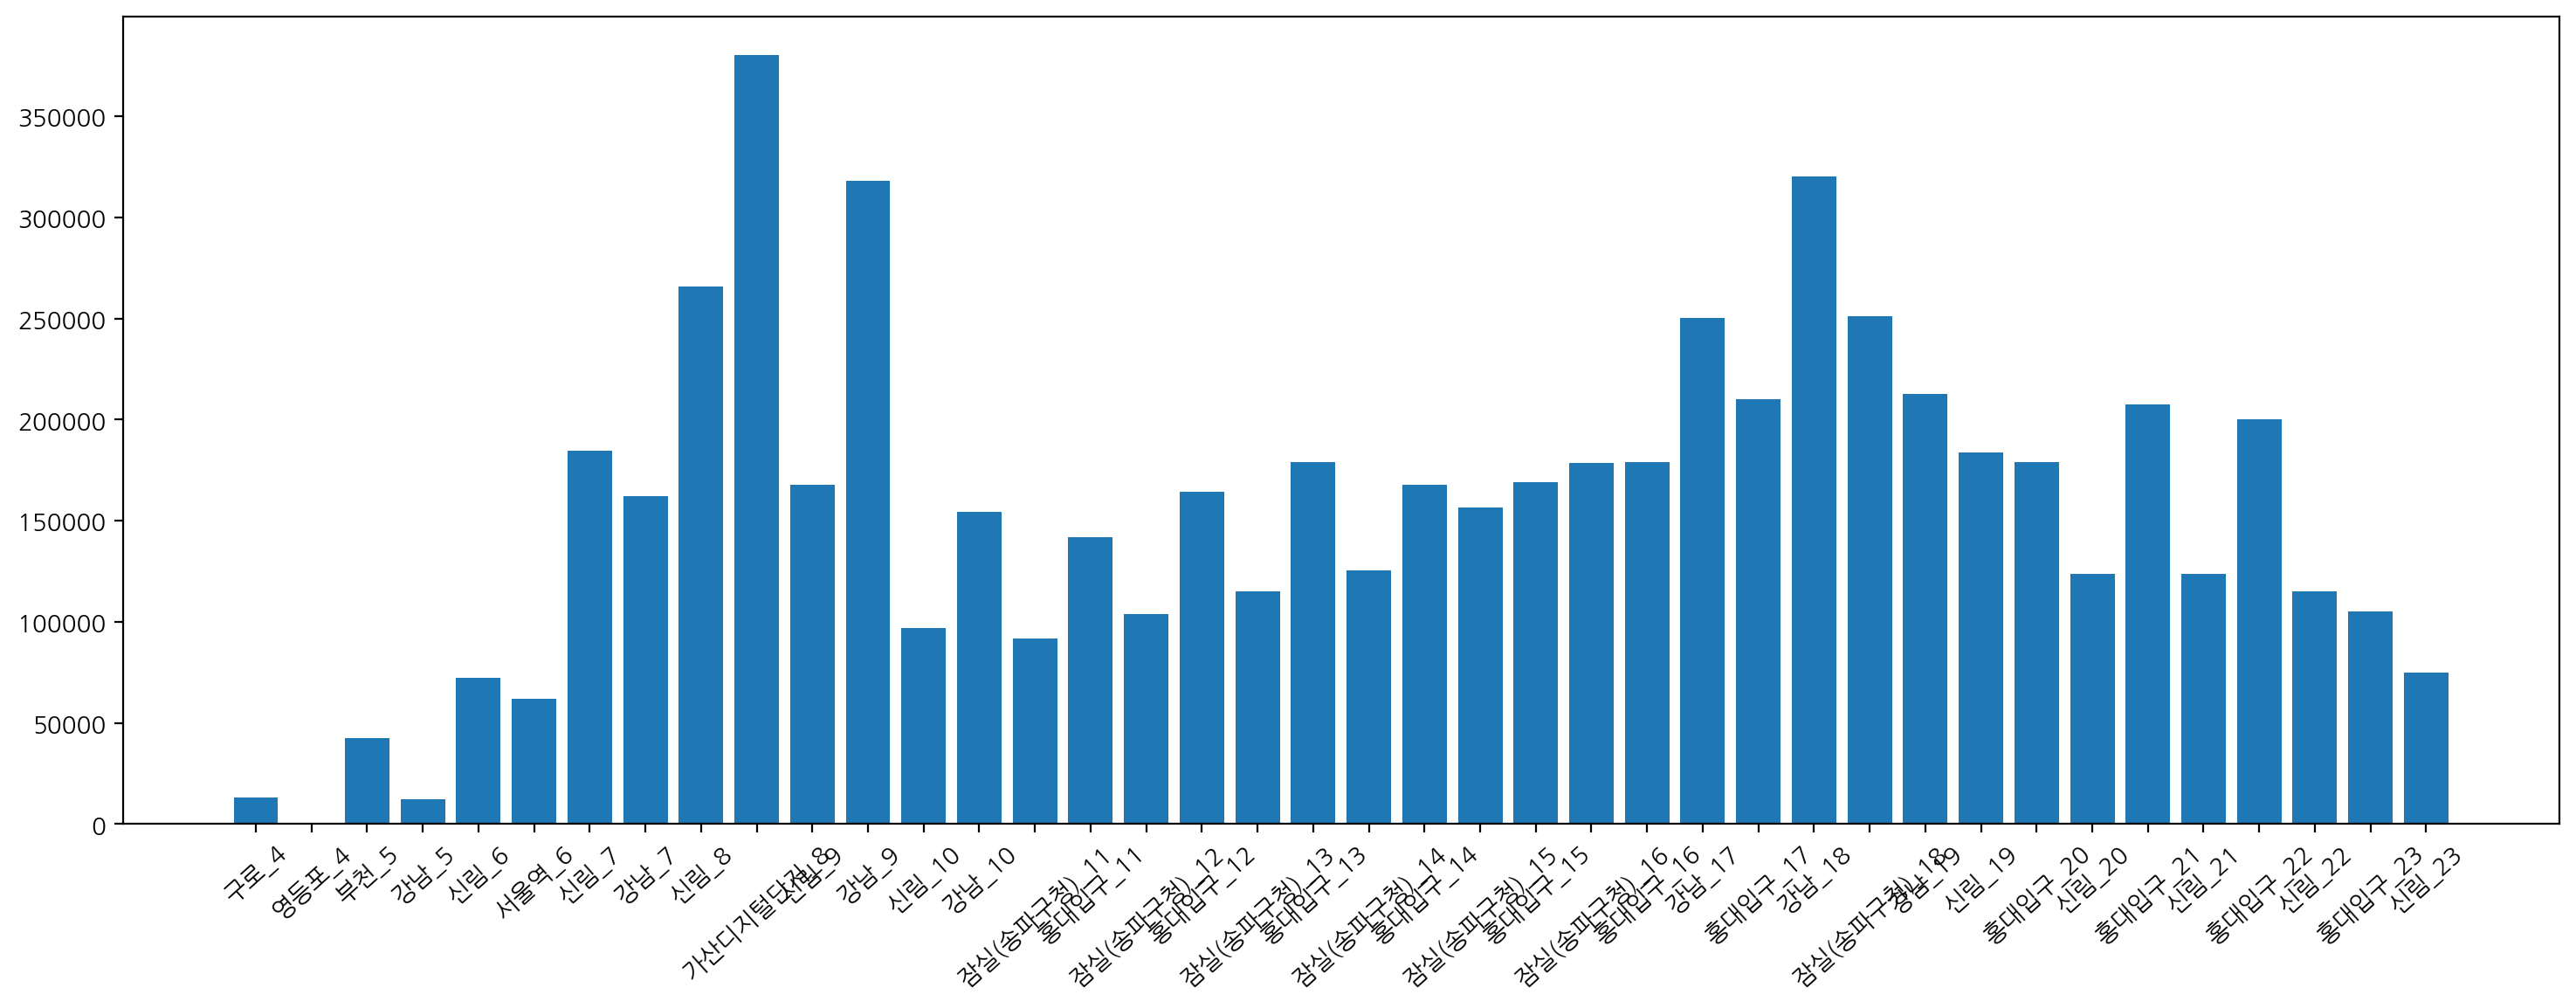

In [ ]:
# x : 혼잡역, y : 승객 수
plt.figure(figsize=(18,6))
# plt.bar(x= df_passenger_max_time["혼잡역"], height= df_passenger_max_time["승객수"], data= df_passenger_max_time);
plt.bar(x="혼잡역", height="승객수", data = df_passenger_max_time)
plt.xticks(rotation=42);

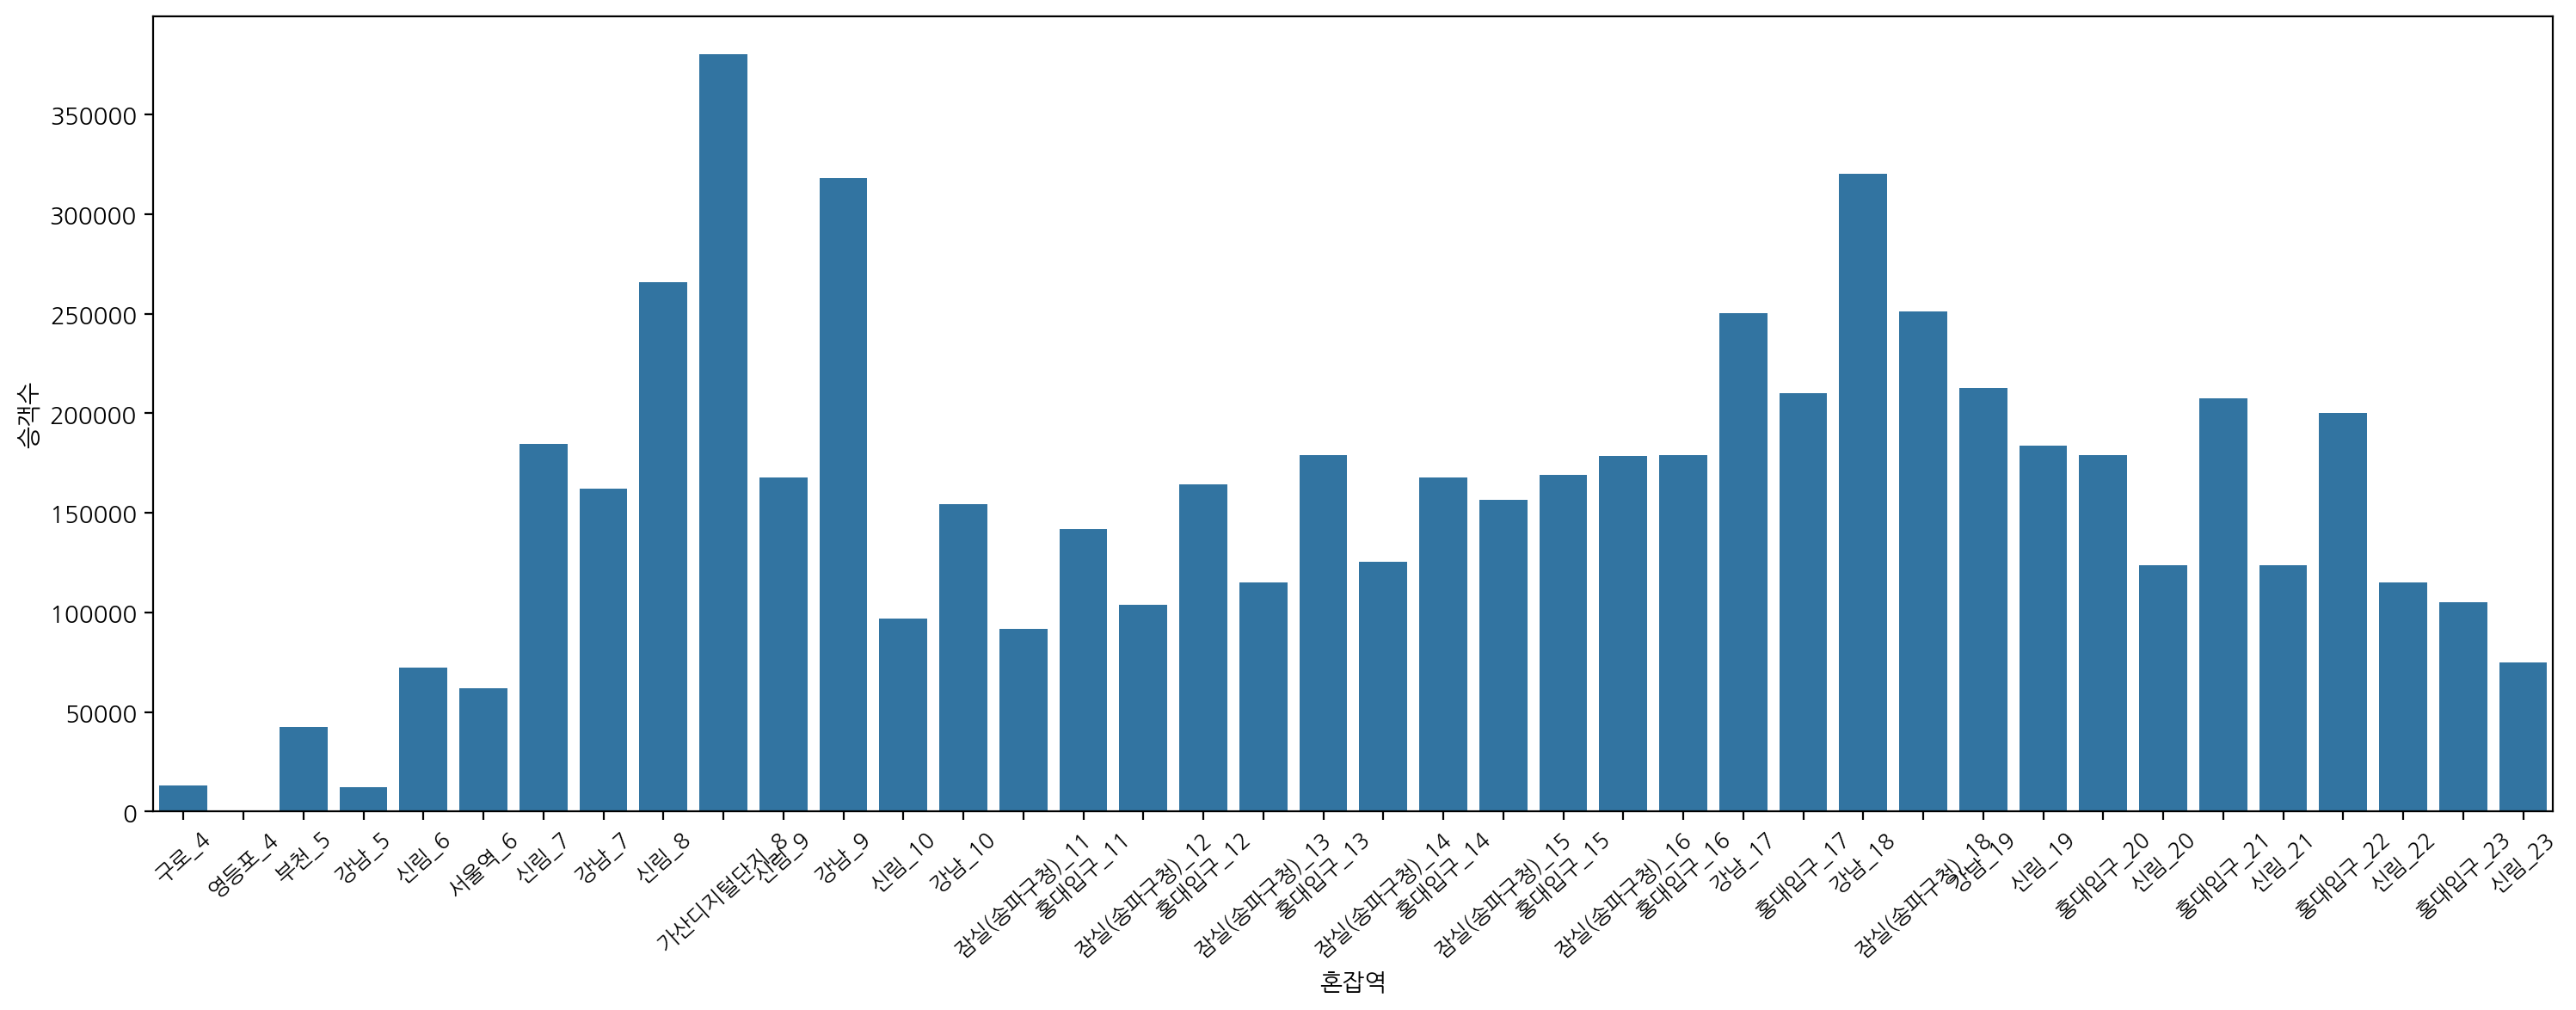

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x="혼잡역", y="승객수", data = df_passenger_max_time)
ax.set_xticklabels(df_passenger_max_time["혼잡역"], rotation  = 42, fontsize=9);

In [ ]:
# 승차만 보기
df_max_in = df_passenger_max_time[df_passenger_max_time["승하차"].str.contains("승차")].copy()
df_max_in

df_max_out = df_passenger_max_time[df_passenger_max_time["승하차"].str.contains("하차")].copy()
df_max_out

,승하차,idx_max,승객수,지하철역,hour,혼잡역
1,하차_4,125,131,영등포,4,영등포_4
3,하차_5,31,12221,강남,5,강남_5
5,하차_6,0,61682,서울역,6,서울역_6
7,하차_7,31,161939,강남,7,강남_7
9,하차_8,520,380181,가산디지털단지,8,가산디지털단지_8
11,하차_9,31,318183,강남,9,강남_9
13,하차_10,31,154527,강남,10,강남_10
15,하차_11,48,141804,홍대입구,11,홍대입구_11
17,하차_12,48,164121,홍대입구,12,홍대입구_12
19,하차_13,48,178801,홍대입구,13,홍대입구_13


<Axes: title={'center': '승차 시 가장 혼잡한 역'}, xlabel='지하철역'>

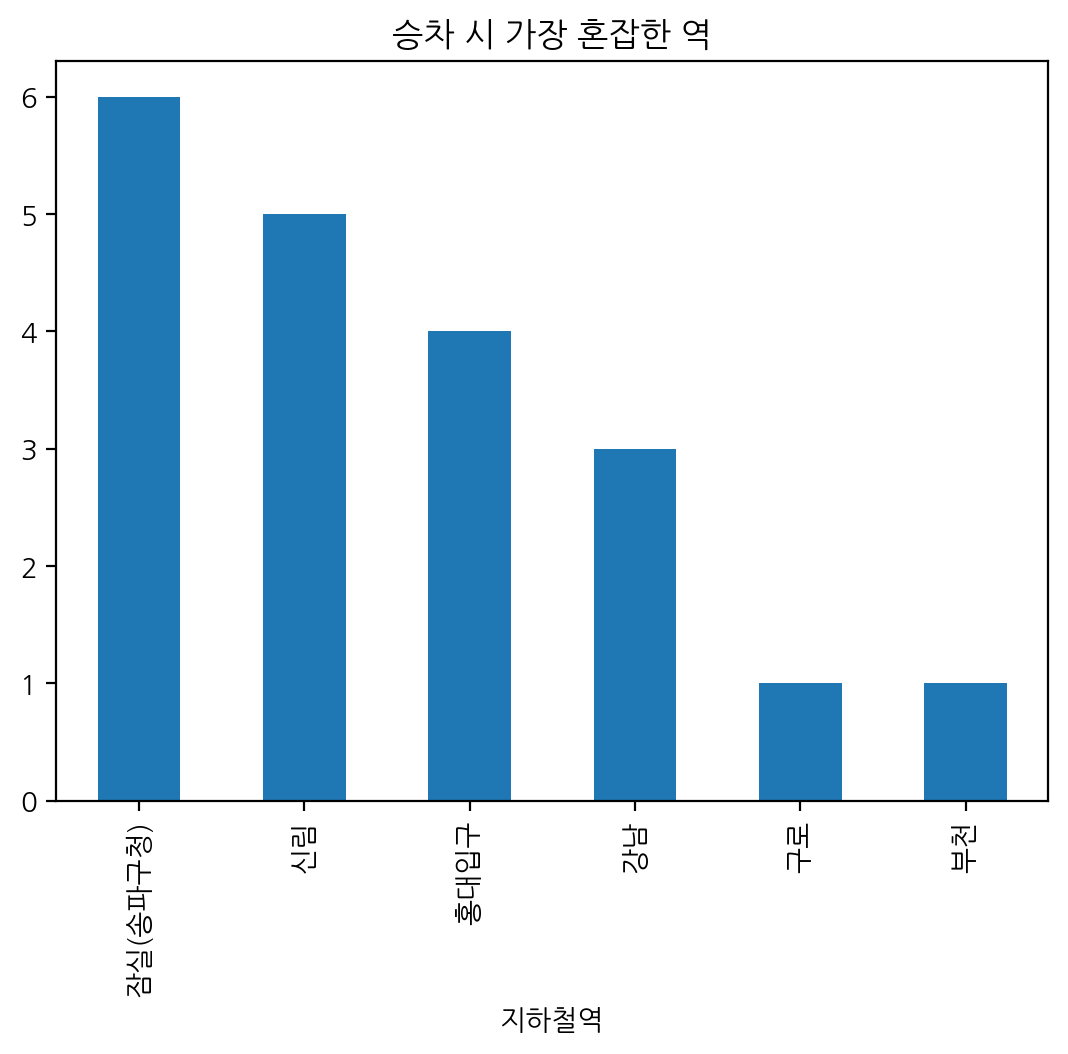

In [ ]:
# df_max_in.plot.bar(x="혼잡역", y ="승객수", figsize=(15,6), rot= 42)
plt.title("승차 시 가장 혼잡한 역")
df_max_in["지하철역"].value_counts().plot.bar()

<Axes: xlabel='지하철역', ylabel='count'>

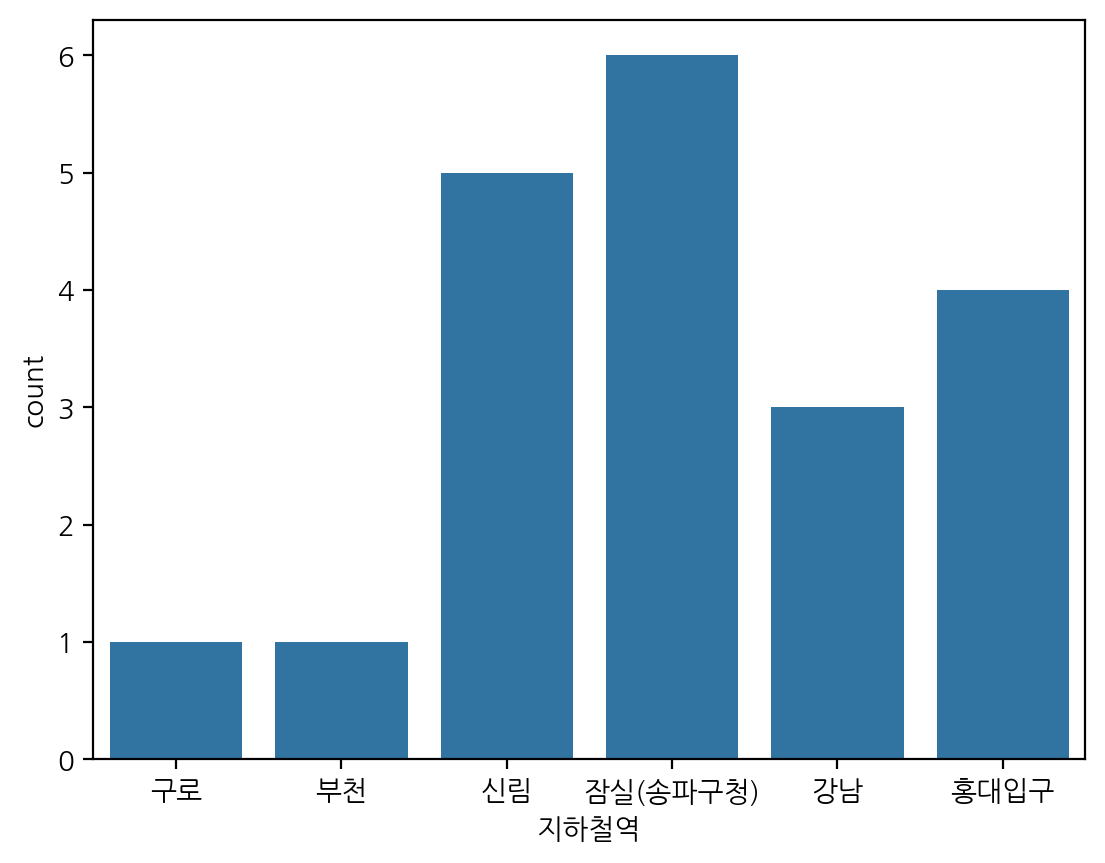

In [ ]:
sns.countplot(data=df_max_in, x = "지하철역")